ESTRUTURAS

In [ ]:
!pip install rasterio -q
!pip install spectral -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 KB 5.5 MB/s eta 0:00:00


In [ ]:
# Importar as bibliotecas
import rasterio as rio
from spectral import imshow
import numpy as np
import matplotlib.pyplot as plt
import glob #Para juntar vários ficheiros numa lista

In [ ]:
# PARA MONTAR O DRIVE, QUE SÓ SE FAZ UMA VEZ
#from google.colab import drive
#drive.mount("/content/drive")

In [ ]:
# Leitura das imagens em Array. O *.tif significa que lê todos os ficheiros com este formato.
files_list = list(glob.glob('/content/drive/MyDrive/ALOS/*.tif'))# ao colocar list estou a pedir que armazene estes dados em formato de lista

In [ ]:
print(files_list)

['/content/drive/MyDrive/ALOS/ALOS_HH.tif', '/content/drive/MyDrive/ALOS/ALOS_HV.tif', '/content/drive/MyDrive/ALOS/ALOS_VH.tif', '/content/drive/MyDrive/ALOS/ALOS_VV.tif']


In [ ]:
# Leitura das imagens e conversão em array
with rio.open(files_list[0]) as src1:
  VV = src1.read(1)
with rio.open(files_list[1]) as src1:
  VH = src1.read(1)
with rio.open(files_list[2]) as src1:
  HV = src1.read(1)
with rio.open(files_list[3]) as src1:
  HH = src1.read(1) 

In [ ]:
# Para saber qual a forma da imagem
VV.shape

(1767, 1909)

In [ ]:
# Para saber qual o tipo
type(VV)

numpy.ndarray

In [ ]:
# Empilhando os dados
stack = np.dstack([VV, VH, HV, HH])

In [ ]:
stack.shape

(1767, 1909, 4)

ImageView object:
  Display bands       :  (0, 1, 3)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.01291745901107788, 1.3298540115356445]
    G: [0.001498111174441874, 0.14675019681453705]
    B: [0.010177710093557835, 0.7235181331634521]

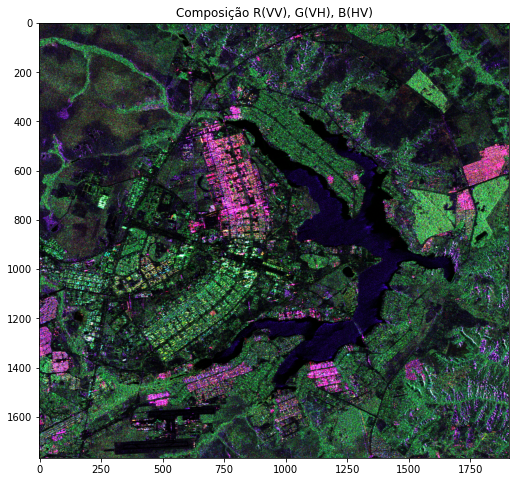

In [ ]:
# Visualizando composição colorida
imshow(stack, bands=(0,1,3), figsize=(12,8), title="Composição R(VV), G(VH), B(HV)",
       stretch = (0.02, 0.98)) #O stretch é aplicado para esticar os parametros de visualização, minimo 2% e maximo 98%. Caso contrário a imagem seria preta

In [ ]:
# Função de expansão de histograma
def expansao(img, percent_ini=2, percent_fim=98):
  s = np.zeros_like(img)
  x,y = 0, 255
  w = np.percentile(img, percent_ini)
  z = np.percentile(img, percent_fim)
  fun = x + (img - w) * (y-x) / (z - w)
  fun[fun<x] = x
  fun[fun>y] = y
  s = fun
  return s

In [ ]:
# Visualizando polarizações separadas
